# Grafos libres de escala :)
dudas y reclamos a javier.vera@pucv.cl

En este mini notebook ahondaremos en cómo describir propiedades de **scale free** en grafos estudiados por los profesores :)

### Primero, leemos datos!!!

In [33]:
## librerias
import networkx as nx
import operator
import itertools
from nltk import sent_tokenize
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
import pickle

In [34]:
## función para extraer texto!

def extract_bible_text(lang):
    root = ET.fromstring(open(lang + '.xml').read())
    with open(lang + '.txt', 'w', encoding='utf-8') as out:
        for n in root.iter('seg'):
            try:
                out.write(n.text.strip() + '\n')
            except AttributeError:
                pass
    file = open(lang+'.txt', 'r') 
    bible=file.read().split('\n')
    #bible=[item for sublist in bible for item in sublist]
    return bible

In [35]:
## nuevo testamento!!!

books_NT=['b.MAT','b.MAR','b.LUK','b.JOH','b.ACT','b.ROM','b.1CO','b.2CO','b.GAL','b.EPH','b.PHI','b.COL',
          'b.1TH','b.2TH','b.1TI','b.2TI','b.TIT','b.PHM','b.HEB','b.JAM','b.1PE','b.2PE','b.1JO','b.2JO',
          'b.3JO','b.JUD','b.REV']

def new_testament(lang):
    root = ET.fromstring(open(lang + '.xml').read())
    NT=[]
    for book in books_NT:
        with open(lang + '-' + book + '.txt', 'w', encoding='utf-8') as out:
            for n in root.findall('.//div[@id="'+book+'"]/*seg'):
                out.write(n.text.strip() + '\n')
        file = open(lang + '-' + book + '.txt', 'r') 
        book_text=file.read().split('\n')
        NT+=book_text
    
    return NT

In [36]:
# language names 
language_names = ['Achuar-NT','Aguaruna-NT','Akawaio-NT','Amuzgo-NT','Cabecar-NT','Cakchiquel-NT','Cherokee-NT',
                  'Chinantec-NT','English','Jakalteko-NT','Kiche-NT','Mam-NT','Nahuatl-NT','Ojibwa-NT','Qeqchi','Quichua-NT',
                  'Shuar-NT','Spanish','Uspanteco-NT']

In [37]:
languages = {}
for language in language_names:
    try:
        if language=='Spanish':
            languages[language]=new_testament(language)
        elif language=='English':
            languages[language]=new_testament(language)
        elif language=='Qeqchi':
            languages[language]=new_testament(language)
        else:
            languages[language.replace('-NT','')]=extract_bible_text(language)#' '.join(extract_bible_text(language))
    except:
        print(language)

Qeqchi


In [38]:
for language in languages.keys():
    print(language, languages[language][0])

Achuar Ju papikia Jesucristo pachisar aarmawaitai. Jesucristo Davidta weari ayayi. Tura Davidcha Abrahama weari ayayi. Tura Abrahama weari ainau, tura Davidta weari ainau naaringkia ju papinum aarmawaitai.
Aguaruna Ju ainawai Jisukristu muunji aajakajua nuna daaji agatkamua duka. Nigka David, Abraham aina nu wegantu aajakuí.
Akawaio Serɨ serɨ Sises tamokori ton ese' asi', kin pe te'sen Tepi' pa pe iyesi'pʉ, Epʉra'an pa pe nɨrɨ kanan iyesi'pʉ.
Amuzgo Luaa ñˈoom na matseijndaaˈñenaˈ tsjaaⁿ nnˈaⁿ na tuiiñe Jesucristo, na wjaacˈoomnaˈ David ñequio Abraham na jndyowicantyjooˈ joona na tueˈcañoomnaˈ jom.
Cabecar Jesucristo David yäbei, Abraham yäbei, je wätsikiwa̱k wa kie äyëí yöle rä jikäi:
Cakchiquel Re wuj ri nuchop el waweˈ, jun wuj ri tzˈibatal wi ca ri quibiˈ ri ye ojer tak ratiˈt rumamaˈ ri Jesucristo. Can nikˈalajin wi cˈa chi Riyaˈ can jun chique ri ye ralcˈual ca ri rey David, y can ralcˈual ca chukaˈ ri Abraham.
Cherokee ᎯᎠ ᎪᏪᎵ ᎧᏃᎮᎭ ᏧᏁᏢᏔᏅᏒ ᏥᏌ ᎦᎶᏁᏛ, ᏕᏫ ᎤᏪᏥ, ᎡᏆᎭᎻ ᎤᏪᏥ.
Chinantec I̱ l

### Segundo, algo de NLP

In [39]:
def clean(language):
    table = str.maketrans({key: None for key in '!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in word_tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in word_tokenize(sentence)]])>0]
    return language

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
for language in languages.keys():
    print(language)
    languages[language]=clean(languages[language])

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Quichua
Shuar
Spanish
Uspanteco


In [42]:
print(len(languages))

18


In [43]:
for language in languages.keys():
    print(language, languages[language][0])

Achuar ['ju', 'papikia', 'jesucristo', 'pachisar', 'aarmawaitai', 'jesucristo', 'davidta', 'weari', 'ayayi', 'tura', 'davidcha', 'abrahama', 'weari', 'ayayi', 'tura', 'abrahama', 'weari', 'ainau', 'tura', 'davidta', 'weari', 'ainau', 'naaringkia', 'ju', 'papinum', 'aarmawaitai']
Aguaruna ['ju', 'ainawai', 'jisukristu', 'muunji', 'aajakajua', 'nuna', 'daaji', 'agatkamua', 'duka', 'nigka', 'david', 'abraham', 'aina', 'nu', 'wegantu', 'aajakuí']
Akawaio ['serɨ', 'serɨ', 'sises', 'tamokori', 'ton', 'ese', "'", 'asi', "'", 'kin', 'pe', "te'sen", 'tepi', "'", 'pa', 'pe', "iyesi'pʉ", "epʉra'an", 'pa', 'pe', 'nɨrɨ', 'kanan', "iyesi'pʉ"]
Amuzgo ['luaa', 'ñˈoom', 'na', 'matseijndaaˈñenaˈ', 'tsjaaⁿ', 'nnˈaⁿ', 'na', 'tuiiñe', 'jesucristo', 'na', 'wjaacˈoomnaˈ', 'david', 'ñequio', 'abraham', 'na', 'jndyowicantyjooˈ', 'joona', 'na', 'tueˈcañoomnaˈ', 'jom']
Cabecar ['jesucristo', 'david', 'yäbei', 'abraham', 'yäbei', 'je', 'wätsikiwa̱k', 'wa', 'kie', 'äyëí', 'yöle', 'rä', 'jikäi']
Cakchiquel ['re', '

### Tercero, al fin grafos!!!

In [44]:
## original networks
def GoW_adj(text_clean,language):
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [45]:
graphs_adj={}
for language in languages.keys():
    print(language)
    G=GoW_adj(languages[language],language)
    graphs_adj[language]=G

Achuar
Aguaruna
Akawaio
Amuzgo
Cabecar
Cakchiquel
Cherokee
Chinantec
English
Jakalteko
Kiche
Mam
Nahuatl
Ojibwa
Quichua
Shuar
Spanish
Uspanteco


In [46]:
pickle.dump(graphs_adj,open('graphs_adj.p','wb'))

In [47]:
graphs_adj=pickle.load(open('graphs_adj.p','rb'))

### Cuarto, distribuciones de grado!!!

In [52]:
## degree!!!

degree = {language:graphs_adj[language].degree() for language in graphs_adj.keys()}

In [50]:
degree_counts = {language:[np.log10(x) for x in list(dict(degree[language]).values())] for language in degree.keys()} 

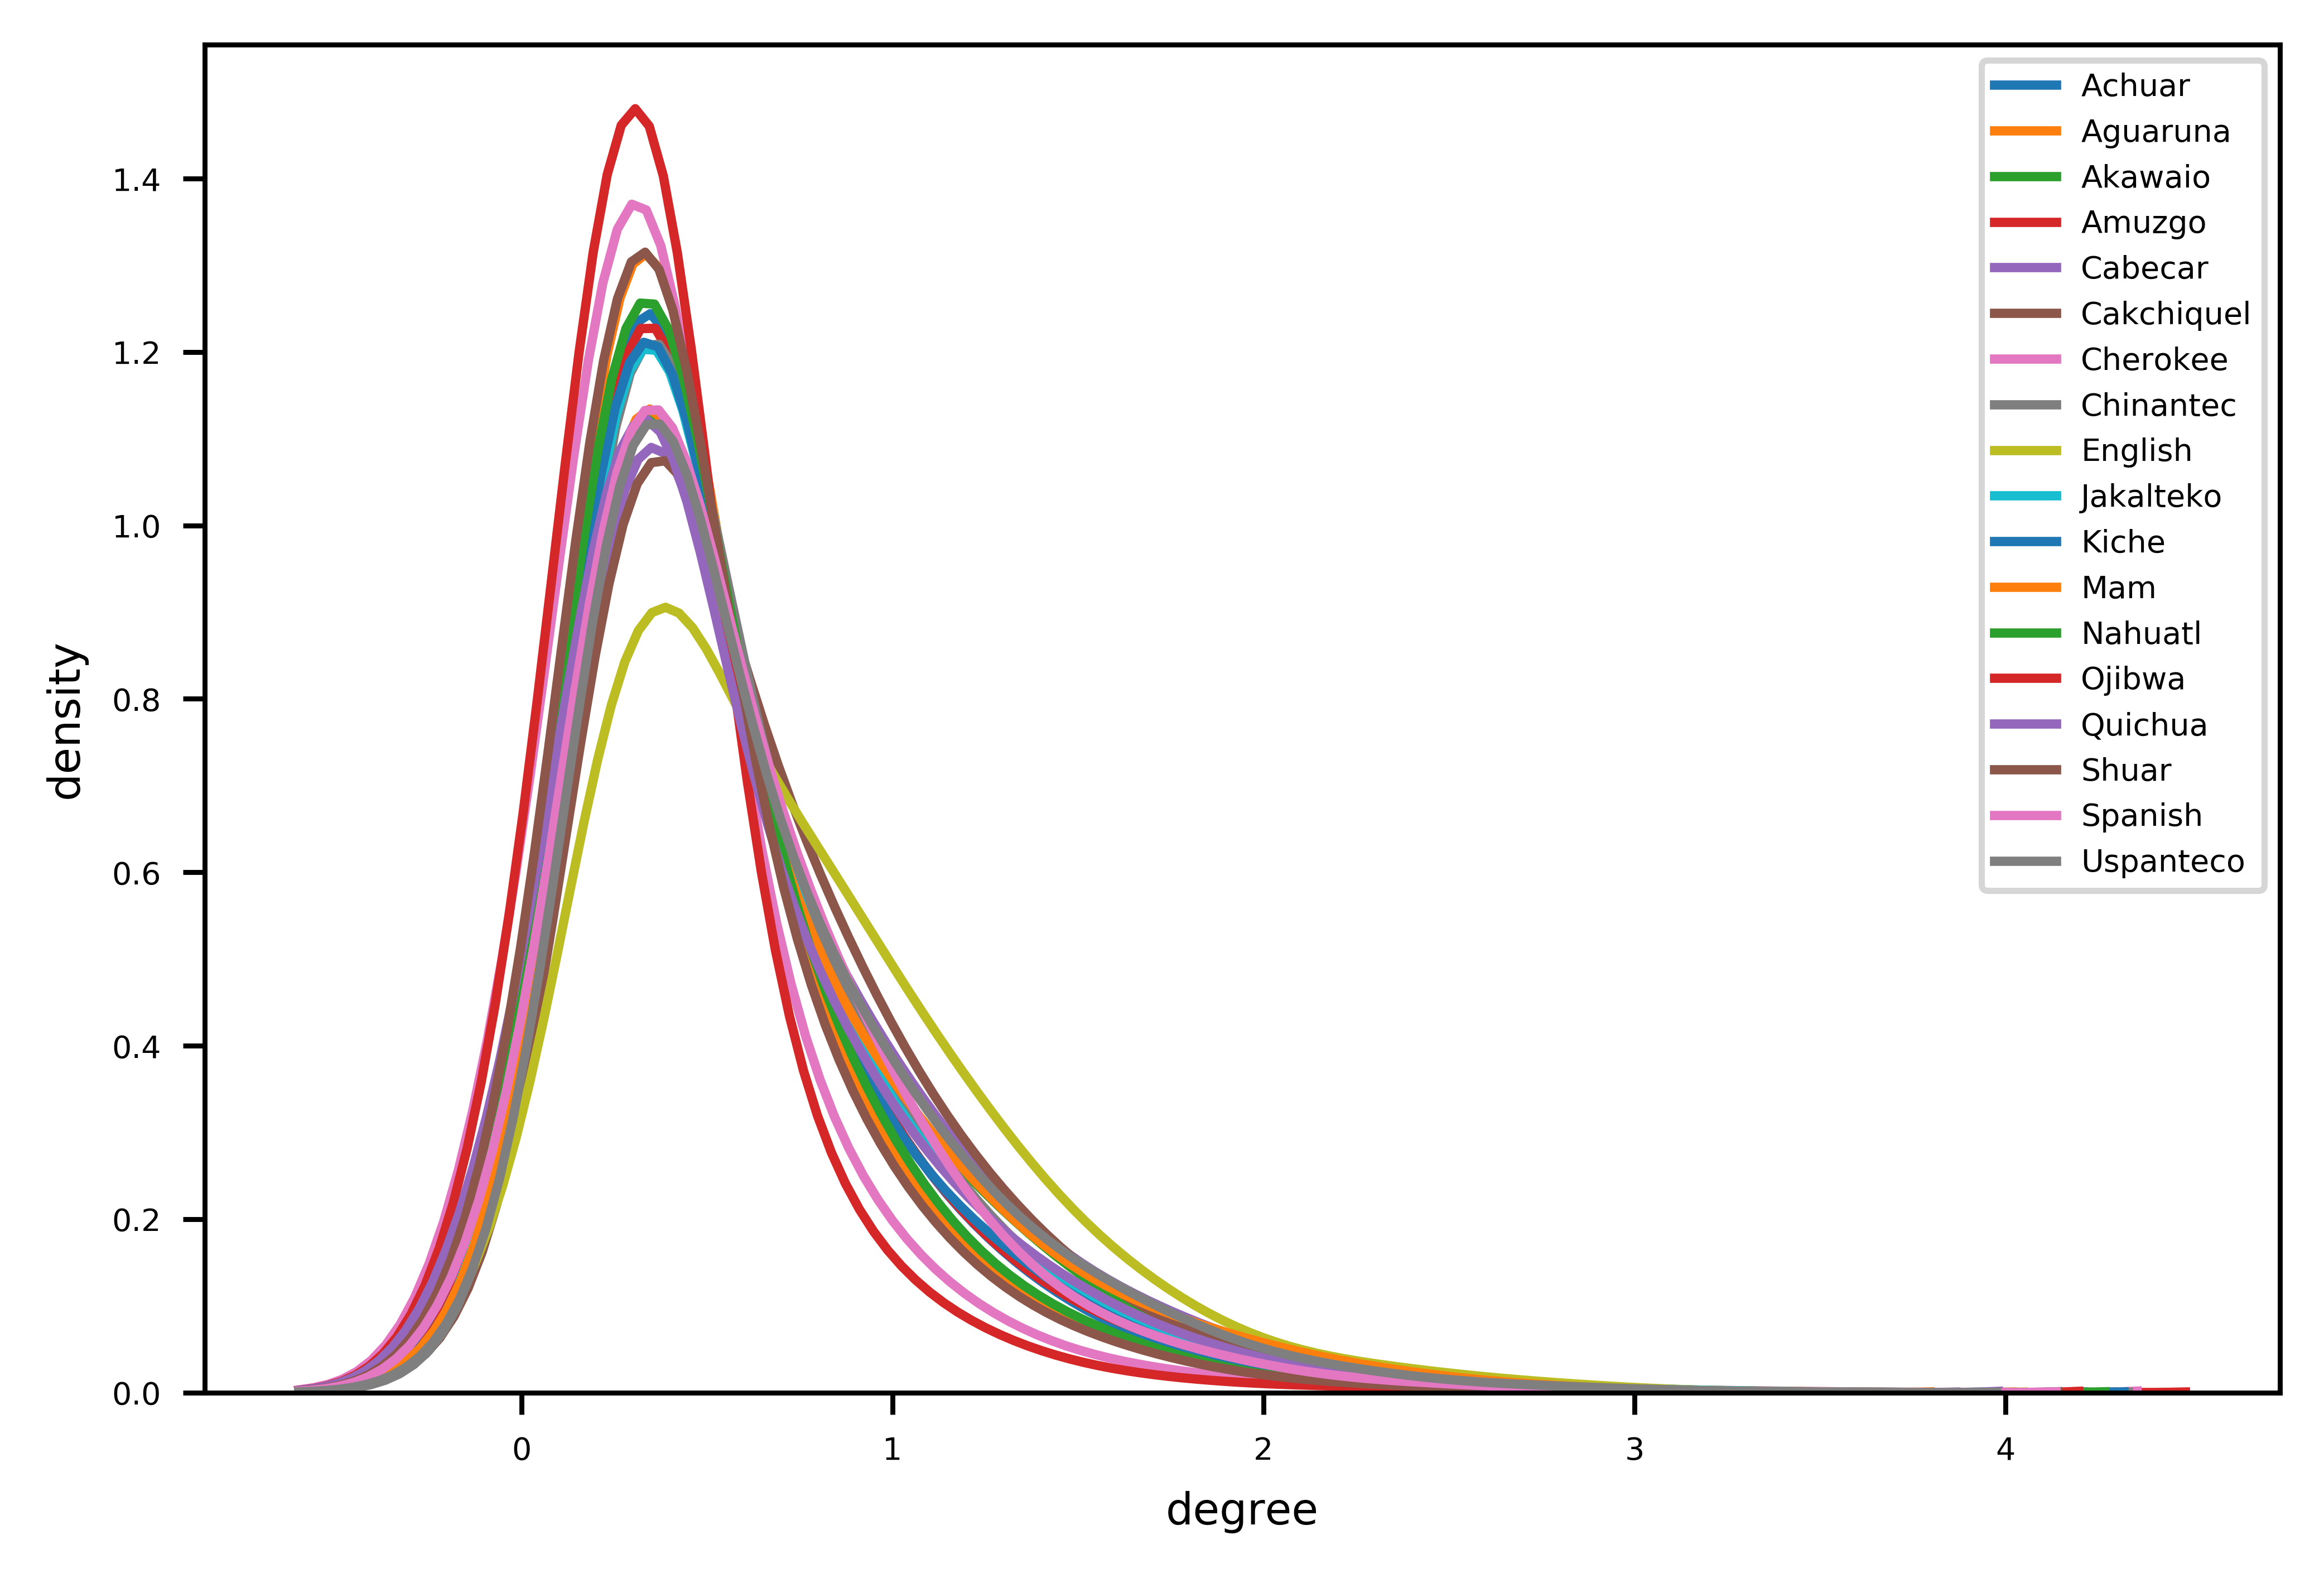

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
for language in degree_counts.keys():
    sns.kdeplot(degree_counts[language],shade=False,label=language,bw=0.2)

plt.ylabel(r'density',fontsize=7)
plt.xlabel(r'degree',fontsize=7)
plt.savefig('degree_hist.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.rcParams.update({'font.size': 5})
plt.show()

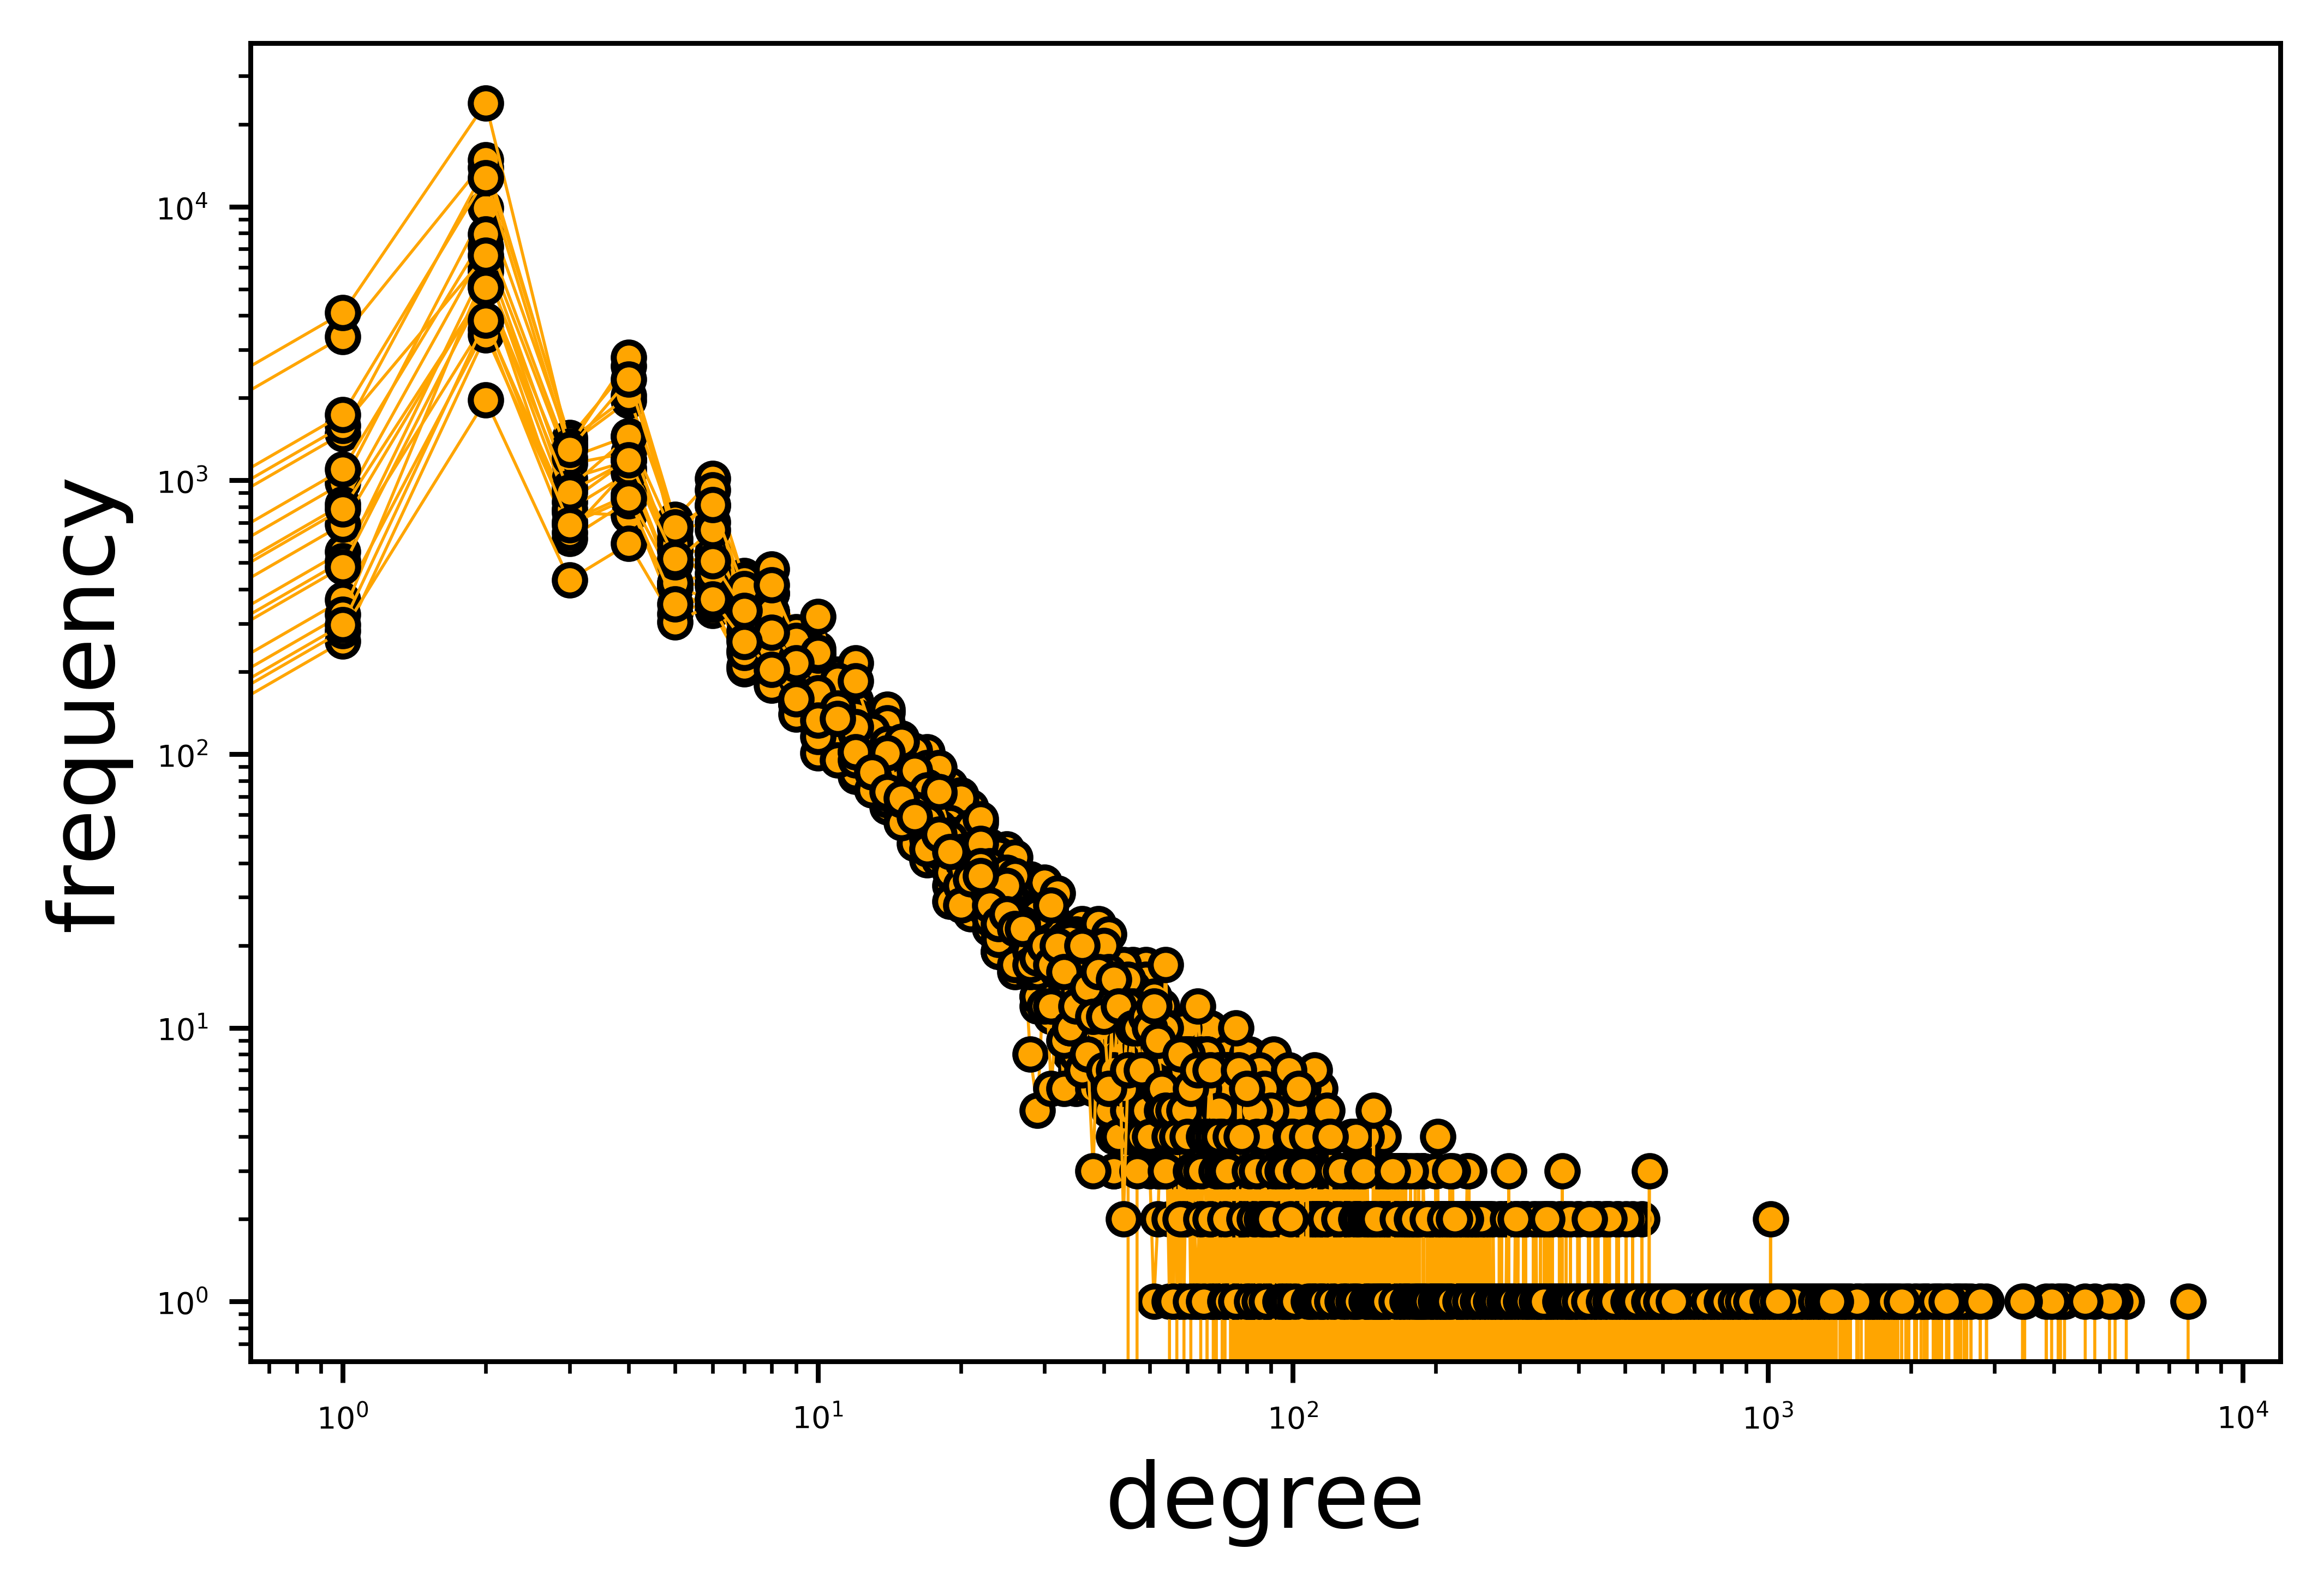

In [55]:
## otra forma
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

fig, ax = plt.subplots(dpi=800)

for language in graphs_adj.keys():

    degree_freq = nx.degree_histogram(graphs_adj[language])
    degrees = range(len(degree_freq))
    plt.loglog(degrees, degree_freq,linewidth=0.5, marker='o',color='orange',markersize=5,markeredgecolor='k',markeredgewidth=1,fillstyle='full') 
    
plt.ylabel(r'frequency',fontsize=15)
plt.xlabel(r'degree',fontsize=15)
plt.savefig('degree_dist.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.rcParams.update({'font.size': 15})
plt.show()

In [56]:
!pip install powerlaw

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [63]:
## fit power law!!!

import powerlaw

power_alpha = {}

for language in graphs_adj.keys():

    data = nx.degree_histogram(graphs_adj[language])
    
    results = powerlaw.Fit(data,xmax=100)
    power_alpha[language] = results.power_law.alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

In [64]:
power_alpha

{'Achuar': 2.168962796990371,
 'Aguaruna': 2.1319429857900785,
 'Akawaio': 2.083855391588741,
 'Amuzgo': 2.0977096804836686,
 'Cabecar': 2.134493808632606,
 'Cakchiquel': 1.9047854134722444,
 'Cherokee': 2.1559830617735454,
 'Chinantec': 2.236335177060473,
 'English': 2.1602246691303373,
 'Jakalteko': 2.0823805097920896,
 'Kiche': 2.1608279806923747,
 'Mam': 2.0285579945406553,
 'Nahuatl': 2.1367766309420317,
 'Ojibwa': 2.3710813044786176,
 'Quichua': 2.027265098008115,
 'Shuar': 2.174321226976313,
 'Spanish': 2.0973169546008386,
 'Uspanteco': 2.118137165366827}